
# 🏫 Caso 3 – Campus IA: Ruta Inteligente

## Contexto:
Un estudiante desea encontrar la mejor ruta desde el Edificio `A` (Facultad de Ingeniería) hasta el Edificio `F` (Pabellón de Innovación), minimizando el tráfico (peso) en el camino.

## Grafo del Campus:

```
A --2--> B --3--> D
|         |
4         1
|         |
C --5--> E --2--> F
```

## Algoritmos utilizados:
- 🌄 Hill Climbing (basado en menor peso en cada paso)
- 🌟 A* (considerando el costo total + heurística basada en estimación de distancia)

---


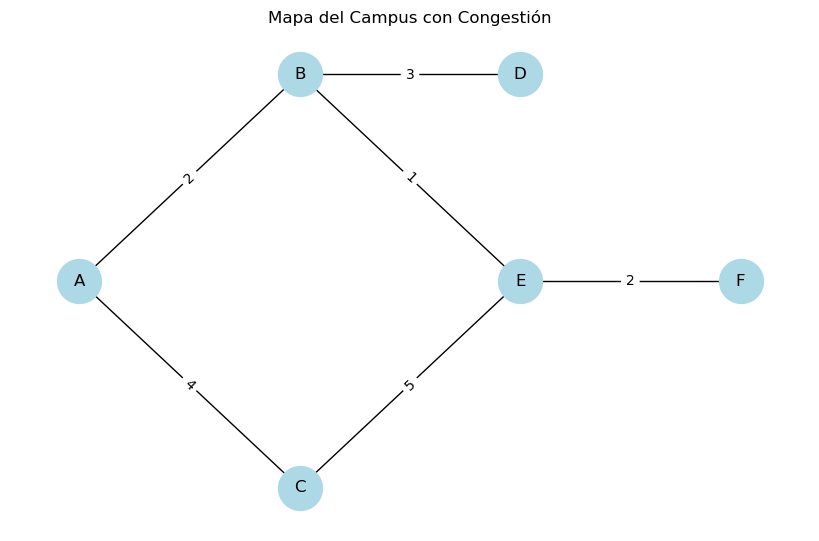

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo dirigido con pesos (congestión)
G = nx.Graph()
G.add_weighted_edges_from([
    ('A', 'B', 2),
    ('A', 'C', 4),
    ('B', 'D', 3),
    ('B', 'E', 1),
    ('C', 'E', 5),
    ('E', 'F', 2)
])

pos = {
    'A': (0, 1),
    'B': (1, 2),
    'C': (1, 0),
    'D': (2, 2),
    'E': (2, 1),
    'F': (3, 1)
}

plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Mapa del Campus con Congestión")
plt.show()


In [2]:

# Algoritmo Hill Climbing
def hill_climbing(grafo, inicio, objetivo):
    actual = inicio
    camino = [actual]
    visitados = set()

    while actual != objetivo:
        vecinos = list(grafo.neighbors(actual))
        vecinos = [n for n in vecinos if n not in visitados]
        if not vecinos:
            break
        siguiente = min(vecinos, key=lambda x: grafo[actual][x]['weight'])
        visitados.add(actual)
        actual = siguiente
        camino.append(actual)
    return camino

camino_hill = hill_climbing(G, 'A', 'F')
congestion_hill = sum(G[camino_hill[i]][camino_hill[i+1]]['weight'] for i in range(len(camino_hill)-1))
print("Camino Hill Climbing:", camino_hill)
print("Congestión total:", congestion_hill)


Camino Hill Climbing: ['A', 'B', 'E', 'F']
Congestión total: 5


In [3]:

from heapq import heappop, heappush

# Heurística: distancia en línea recta basada en posición (euclidiana)
def heuristica(nodo, objetivo):
    x1, y1 = pos[nodo]
    x2, y2 = pos[objetivo]
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

def a_star(grafo, inicio, objetivo):
    frontera = [(0 + heuristica(inicio, objetivo), 0, inicio, [inicio])]
    visitados = set()

    while frontera:
        f, costo_actual, actual, camino = heappop(frontera)
        if actual == objetivo:
            return camino
        if actual in visitados:
            continue
        visitados.add(actual)
        for vecino in grafo.neighbors(actual):
            if vecino not in visitados:
                g = costo_actual + grafo[actual][vecino]['weight']
                h = heuristica(vecino, objetivo)
                heappush(frontera, (g + h, g, vecino, camino + [vecino]))
    return []

camino_astar = a_star(G, 'A', 'F')
congestion_astar = sum(G[camino_astar[i]][camino_astar[i+1]]['weight'] for i in range(len(camino_astar)-1))
print("Camino A*:", camino_astar)
print("Congestión total:", congestion_astar)


Camino A*: ['A', 'B', 'E', 'F']
Congestión total: 5


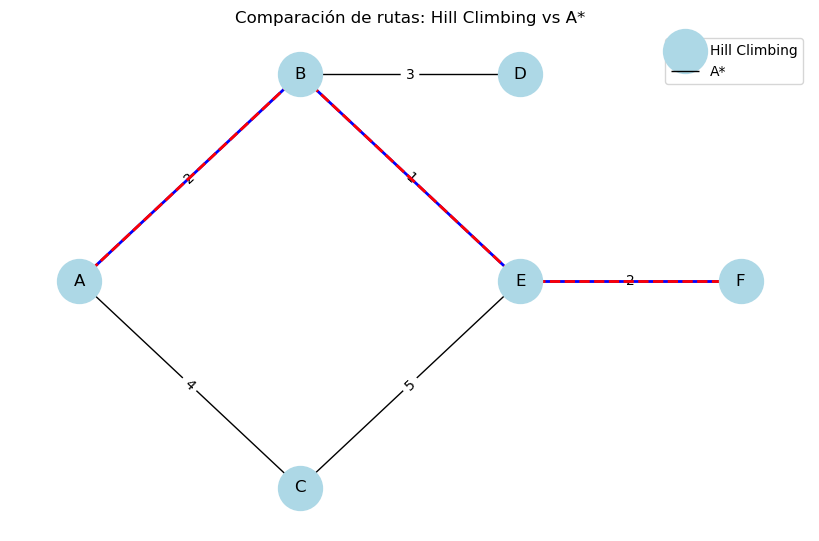

In [4]:

# Mostrar rutas en el grafo
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Resaltar caminos
edge_hill = list(zip(camino_hill, camino_hill[1:]))
edge_astar = list(zip(camino_astar, camino_astar[1:]))

nx.draw_networkx_edges(G, pos, edgelist=edge_hill, edge_color='blue', width=2, label='Hill Climbing')
nx.draw_networkx_edges(G, pos, edgelist=edge_astar, edge_color='red', width=2, style='dashed', label='A*')

plt.title("Comparación de rutas: Hill Climbing vs A*")
plt.legend(["Hill Climbing", "A*"])
plt.show()



## ✅ Conclusión

- El algoritmo **Hill Climbing** elige siempre el vecino con menor peso, pero puede desviarse de la ruta óptima si encuentra un camino localmente mejor.
- **A\*** utiliza una heurística para estimar la distancia restante, logrando una ruta más eficiente en la mayoría de los casos.
- En escenarios con congestión variable, **A\*** es preferible por su balance entre costo real y estimado.

---